<a href="https://colab.research.google.com/github/chandraSekar123/ML_Deployment_Django/blob/master/Decision_Tree_Regressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict, train_test_split
import seaborn as sns
from sklearn import datasets
from sklearn.metrics import mean_squared_error

from sklearn.tree import DecisionTreeRegressor

In [153]:
# #############################################################################
# Load data
boston = datasets.load_boston()
print(boston.data.shape, boston.target.shape)
print(boston.feature_names)

(506, 13) (506,)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [154]:
data = pd.DataFrame(boston.data,columns=boston.feature_names)
data = pd.concat([data,pd.Series(boston.target,name='MEDV')],axis=1)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [0]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [0]:
x_training_set, x_test_set, y_training_set, y_test_set = train_test_split(X,y,test_size=0.10,random_state=42,
shuffle=True)

In [157]:
# Fit regression model
# Estimate the score on the entire dataset, with no missing values
model =  DecisionTreeRegressor(max_depth=4,
                           min_samples_split=5,
                           max_leaf_nodes=10)
model.fit(x_training_set, y_training_set)


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=4,
                      max_features=None, max_leaf_nodes=10,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [158]:
from sklearn.metrics import mean_squared_error, r2_score
model_score = model.score(x_training_set,y_training_set)
# Have a look at R sq to give an idea of the fit ,
# Explained variance score: 1 is perfect prediction
print("coefficient of determination R^2 of the prediction.: ",model_score)
y_predicted = model.predict(x_test_set)

# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(y_test_set, y_predicted))
# Explained variance score: 1 is perfect prediction
print('Test Variance score: %.2f' % r2_score(y_test_set, y_predicted))

coefficient of determination R^2 of the prediction.:  0.8632516185324554
Mean squared error: 17.90
Test Variance score: 0.71


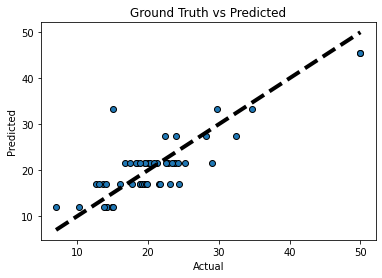

In [159]:
# So let's run the model against the test data
from sklearn.model_selection import cross_val_predict

fig, ax = plt.subplots()
ax.scatter(y_test_set, y_predicted, edgecolors=(0, 0, 0))
ax.plot([y_test_set.min(), y_test_set.max()], [y_test_set.min(), y_test_set.max()], 'k--', lw=4)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()

In [160]:
### Hyperparameter tuning with GridSearchCV¶
param_grid = {"criterion": ["mse", "mae"],
              "min_samples_split": [10, 20, 40],
              "max_depth": [2, 6, 8],
              "min_samples_leaf": [20, 40, 100],
              "max_leaf_nodes": [5, 20, 100],
              }

## Comment in order to publish in kaggle.

grid_cv_dtm = GridSearchCV(model, param_grid, cv=5)

grid_cv_dtm.fit(x_training_set,y_training_set)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=4, max_features=None,
                                             max_leaf_nodes=10,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=5,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [2, 6, 8],
                         'max_leaf_nodes': [5, 20, 100],
                         

In [161]:
print("R-Squared::{}".format(grid_cv_dtm.best_score_))
print("Best Hyperparameters::\n{}".format(grid_cv_dtm.best_params_))

R-Squared::0.7438283733576683
Best Hyperparameters::
{'criterion': 'mse', 'max_depth': 6, 'max_leaf_nodes': 20, 'min_samples_leaf': 20, 'min_samples_split': 10}


In [162]:
df = pd.DataFrame(data=grid_cv_dtm.cv_results_)
df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_max_leaf_nodes,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003469,0.000929,0.001840,0.000582,mse,2,5,20,10,"{'criterion': 'mse', 'max_depth': 2, 'max_leaf...",0.662116,0.666803,0.613794,0.68595,0.609099,0.647552,0.030579,71
1,0.003745,0.001332,0.001552,0.000281,mse,2,5,20,20,"{'criterion': 'mse', 'max_depth': 2, 'max_leaf...",0.662116,0.666803,0.613794,0.68595,0.609099,0.647552,0.030579,64
2,0.002580,0.000237,0.001349,0.000138,mse,2,5,20,40,"{'criterion': 'mse', 'max_depth': 2, 'max_leaf...",0.662116,0.666803,0.613794,0.68595,0.609099,0.647552,0.030579,71
3,0.002397,0.000039,0.001270,0.000058,mse,2,5,40,10,"{'criterion': 'mse', 'max_depth': 2, 'max_leaf...",0.634153,0.606446,0.578146,0.68595,0.547363,0.610412,0.047543,93
4,0.002196,0.000144,0.001074,0.000015,mse,2,5,40,20,"{'criterion': 'mse', 'max_depth': 2, 'max_leaf...",0.634153,0.606446,0.578146,0.68595,0.547363,0.610412,0.047543,91


[Text(0.5, 1.0, 'Effect of Depth and Leaf Nodes on Model Performance')]

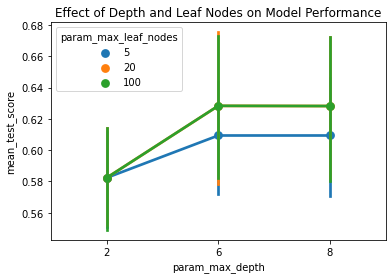

In [163]:

fig,ax = plt.subplots()
sns.pointplot(data=df[['mean_test_score',
                           'param_max_leaf_nodes',
                           'param_max_depth']],
             y='mean_test_score',x='param_max_depth',
             hue='param_max_leaf_nodes',ax=ax)
ax.set(title="Effect of Depth and Leaf Nodes on Model Performance")

In [164]:
# Evaluating training model
predicted = grid_cv_dtm.best_estimator_.predict(X)
residuals = y.flatten()-predicted

fig, ax = plt.subplots()
ax.scatter(y.flatten(), residuals)
ax.axhline(lw=2,color='black')
ax.set_xlabel('Observed')
ax.set_ylabel('Residual')
plt.show()

AttributeError: ignored

In [0]:
model.get_depth()

In [0]:
import math

In [167]:
dataset=pd.read_csv("weather_dataset.csv")
dataset.head()

,Day,Outlook,Temp.,Humidity,Wind,Decision
0,1,Sunny,Mild,High,False,45
1,2,Sunny,cool,Normal,False,52
2,3,Sunny,cool,Normal,True,23
3,4,Sunny,Mild,Normal,False,46
4,5,Sunny,Mild,High,True,30


In [223]:
### chandra's code for decision tree regression for calculating total standard devation all categorical variables

def calc_Total_SD(dataframe,targetcol):
  avg=dataframe[targetcol].mean()
  count=len(dataframe[targetcol])
 
  dataframe["squared"]= avg - dataframe[targetcol]
  dataframe["squared"]= (dataframe["squared"]**2/count)
  total_sd=dataframe["squared"].sum()
  total_sd=round(math.sqrt(total_sd),4)
  return total_sd


totla_sd=calc_Total_SD(dataset,"Decision")
totla_sd

9.3211

In [224]:
### chandra's code for decision tree regression for calculating total standard devation on one feature

features_sd=[]
def cal_sd_single_feature(dataframe,colnames,targetcol):

  
  for cols in colnames:
    for col in dataframe[cols].unique():
        total=dataframe[targetcol].count()
        avg=dataframe[targetcol][dataframe[cols]==col].mean()
        count=len(dataframe[targetcol][dataframe[cols]==col])
        dataframe["squared"]= avg - dataframe[targetcol][dataframe[cols]==col]
        dataframe["squared"]= (dataframe["squared"]**2/count)
        feature_dev=dataframe["squared"].sum()
        feature_dev=round(math.sqrt(feature_dev),4)
        
        sd=(count/total*feature_dev)
        print(cols,"-",col,"-",round(avg,4),"-",count,"-",total,"-",feature_dev,"-",round(sd,4))
        features_sd.append(sd)
        
        
             

      
     

cal_sd_single_feature(dataset,["Outlook","Temp.","Humidity","Wind"],"Decision")
print(features_sd)


Outlook - Sunny - 39.2 - 5 - 14 - 10.8701 - 3.8822
Outlook - Overcast - 46.25 - 4 - 14 - 3.4911 - 0.9975
Outlook - Rainy - 35.2 - 5 - 14 - 7.782 - 2.7793
Temp. - Mild - 42.6667 - 6 - 14 - 7.6522 - 3.2795
Temp. - cool - 39.0 - 4 - 14 - 10.5119 - 3.0034
Temp. - Hot - 36.25 - 4 - 14 - 8.9547 - 2.5585
Humidity - High - 37.5714 - 7 - 14 - 9.3634 - 4.6817
Humidity - Normal - 42.0 - 7 - 14 - 8.7342 - 4.3671
Wind - False - 41.375 - 8 - 14 - 7.873 - 4.4989
Wind - True - 37.6667 - 6 - 14 - 10.5935 - 4.5401
[3.8821785714285717, 0.9974571428571428, 2.7792857142857144, 3.2795142857142854, 3.0034, 2.5584857142857143, 4.6817, 4.3671, 4.498857142857143, 4.540071428571428]


In [231]:
## chandra's code for decision tree regression for calculating total standard devation on one feature

features_sd=[]
def cal_sd_single_feature(dataframe,colnames,targetcol):

  
  for cols in colnames:
    local_sd=0
    for col in dataframe[cols].unique():
        total=dataframe[targetcol].count()
        avg=dataframe[targetcol][dataframe[cols]==col].mean()
        count=len(dataframe[targetcol][dataframe[cols]==col])
        dataframe["squared"]= avg - dataframe[targetcol][dataframe[cols]==col]
        dataframe["squared"]= (dataframe["squared"]**2/count)
        feature_dev=dataframe["squared"].sum()
        feature_dev=round(math.sqrt(feature_dev),2)
        
        sd=(count/total*feature_dev)
        local_sd=round(local_sd+sd,2)
        
        print("local sd is",local_sd)
        print(cols,"-",col,"-",round(avg,2),"-",count,"-",total,"-",feature_dev,"-",round(sd,2),totla_sd)
    min_variance=round(totla_sd-local_sd,2)
    features_sd.append(min_variance)
        
        
             
cal_sd_single_feature(dataset,["Outlook","Temp.","Humidity","Wind"],"Decision")
print(features_sd)
      

local sd is 3.88
Outlook - Sunny - 39.2 - 5 - 14 - 10.87 - 3.88 9.3211
local sd is 4.88
Outlook - Overcast - 46.25 - 4 - 14 - 3.49 - 1.0 9.3211
local sd is 7.66
Outlook - Rainy - 35.2 - 5 - 14 - 7.78 - 2.78 9.3211
local sd is 3.28
Temp. - Mild - 42.67 - 6 - 14 - 7.65 - 3.28 9.3211
local sd is 6.28
Temp. - cool - 39.0 - 4 - 14 - 10.51 - 3.0 9.3211
local sd is 8.84
Temp. - Hot - 36.25 - 4 - 14 - 8.95 - 2.56 9.3211
local sd is 4.68
Humidity - High - 37.57 - 7 - 14 - 9.36 - 4.68 9.3211
local sd is 9.04
Humidity - Normal - 42.0 - 7 - 14 - 8.73 - 4.36 9.3211
local sd is 4.5
Wind - False - 41.38 - 8 - 14 - 7.87 - 4.5 9.3211
local sd is 9.04
Wind - True - 37.67 - 6 - 14 - 10.59 - 4.54 9.3211
[1.66, 0.48, 0.28, 0.28]


In [191]:
csvr cxzdataset["Temp."].unique()

SyntaxError: ignored

In [0]:

dataset.Decision[dataset.Humidity=="High"].mean()

In [111]:
dataset["Decision"]

0     45
1     52
2     23
3     46
4     30
5     46
6     43
7     52
8     44
9     25
10    30
11    35
12    38
13    48
Name: Decision, dtype: int64

In [148]:
dataset.Decision

0     45
1     52
2     23
3     46
4     30
5     46
6     43
7     52
8     44
9     25
10    30
11    35
12    38
13    48
Name: Decision, dtype: int64